In [3]:
# libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')
import numpy as np
import pprint
# stats libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
# Read in necessary csv files
channel_data = pd.read_csv("channel_stats.csv")
cat_data = pd.read_csv("cat_stats.csv")

In [5]:
# Pulling rows of the channel names that were one of top in 2018 from all timeframes
top_chi = channel_data[channel_data['Channel'].str.contains('Uzra')].sort_values(by = "Year", ascending = True).reset_index(drop = True)

top_chi_hk = channel_data[channel_data['Channel'].str.contains('達哥')].sort_values(by = "Year", ascending = True).reset_index(drop = True)

top_eng1 = channel_data[channel_data['Channel'].str.contains('Ninja')].sort_values(by = "Year", ascending = True).reset_index(drop = True) # dropped off after decided leave from Twitch exclusive partner

top_eng2 = channel_data[channel_data['Channel'].str.contains('xQc')].sort_values(by = "Year", ascending = True).reset_index(drop = True)
top_eng = top_eng2.append(top_eng1.iloc[0]).sort_values(by = "Year", ascending = True).reset_index(drop = True)

top_kor = channel_data[channel_data['Channel'].str.contains('풍월량')].sort_values(by = "Year", ascending = True).reset_index(drop = True)

top_por = channel_data[channel_data['Channel'].str.contains('YoDa')].sort_values(by = "Year", ascending = True).reset_index(drop = True)
top_chi

C:\Users\asian\AppData\Local\Temp\ipykernel_14036\2293350565.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_eng = top_eng2.append(top_eng1.iloc[0]).sort_values(by = "Year", ascending = True).reset_index(drop = True)


,Year,Channel,Watch time (mins),Stream time (mins),Average viewers,Followers,Followers gained,Language
0,2018,Uzra,629751195,197190,3193,231471,37337,Chinese
1,2019,Uzra,625362435,209445,2985,231484,28141,Chinese
2,2020,Uzra,925532895,195825,4725,231471,42313,Chinese
3,2021,Uzra,788106915,197640,3987,231484,17765,Chinese
4,2022,Uzra,446368920,233490,1911,231471,8960,Chinese


In [6]:
top_kor

,Year,Channel,Watch time (mins),Stream time (mins),Average viewers,Followers,Followers gained,Language
0,2018,풍월량 (hanryang1125),1606509015,148350,10828,606248,111806,Korean
1,2019,풍월량 (hanryang1125),1908516270,174495,10936,606512,95998,Korean
2,2020,풍월량 (hanryang1125),2371413705,176595,13428,606406,90603,Korean
3,2021,풍월량 (hanryang1125),2546404410,175785,14486,606512,38648,Korean
4,2022,풍월량 (hanryang1125),2544683895,177555,14331,606406,35448,Korean


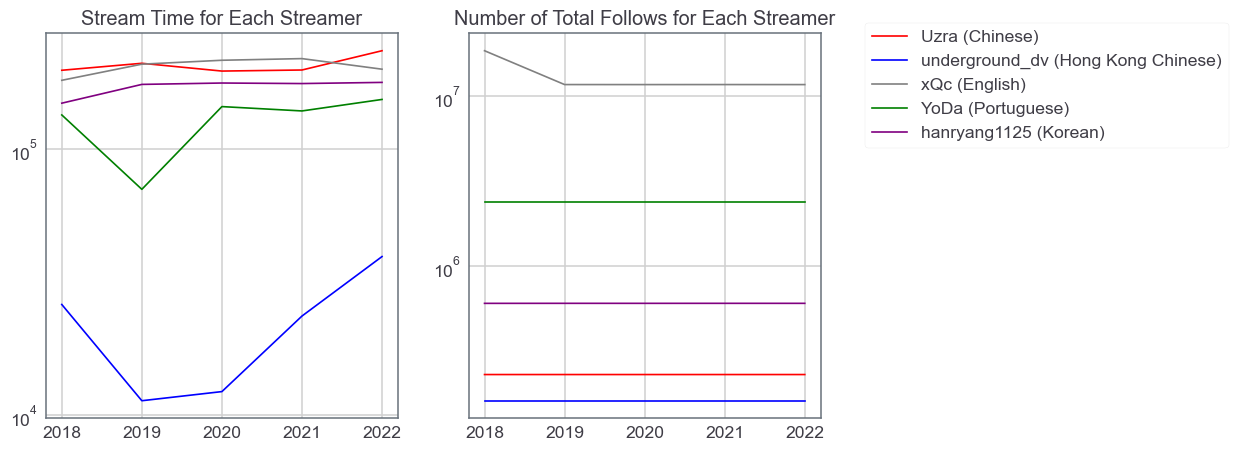

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].plot(top_chi["Year"], top_chi["Stream time (mins)"], label = "Average viewers", color = "red")
axs[1].plot(top_chi["Year"], top_chi["Followers"], label = "Uzra (Chinese)", color = "red")
axs[0].plot(top_chi_hk["Year"], top_chi_hk["Stream time (mins)"], label = "Average viewers", color = "blue")
axs[1].plot(top_chi_hk["Year"], top_chi_hk["Followers"], label = "underground_dv (Hong Kong Chinese)", color = "blue")
axs[0].plot(top_eng["Year"], top_eng["Stream time (mins)"], label = "Average viewers", color = "grey")
axs[1].plot(top_eng["Year"], top_eng["Followers"], label = "xQc (English)", color = "grey")
axs[0].plot(top_por["Year"], top_por["Stream time (mins)"], label = "Average viewers", color = "green")
axs[1].plot(top_por["Year"], top_por["Followers"], label = "YoDa (Portuguese)", color = "green")
axs[0].plot(top_kor["Year"], top_kor["Stream time (mins)"], label = "Average viewers", color = "purple")
axs[1].plot(top_kor["Year"], top_kor["Followers"], label = "hanryang1125 (Korean)", color = "purple")
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_title("Stream Time for Each Streamer")
axs[1].set_title("Number of Total Follows for Each Streamer")
axs[1].legend(bbox_to_anchor=(1.1, 1.05))

Text(0.5, 0, 'Korean')

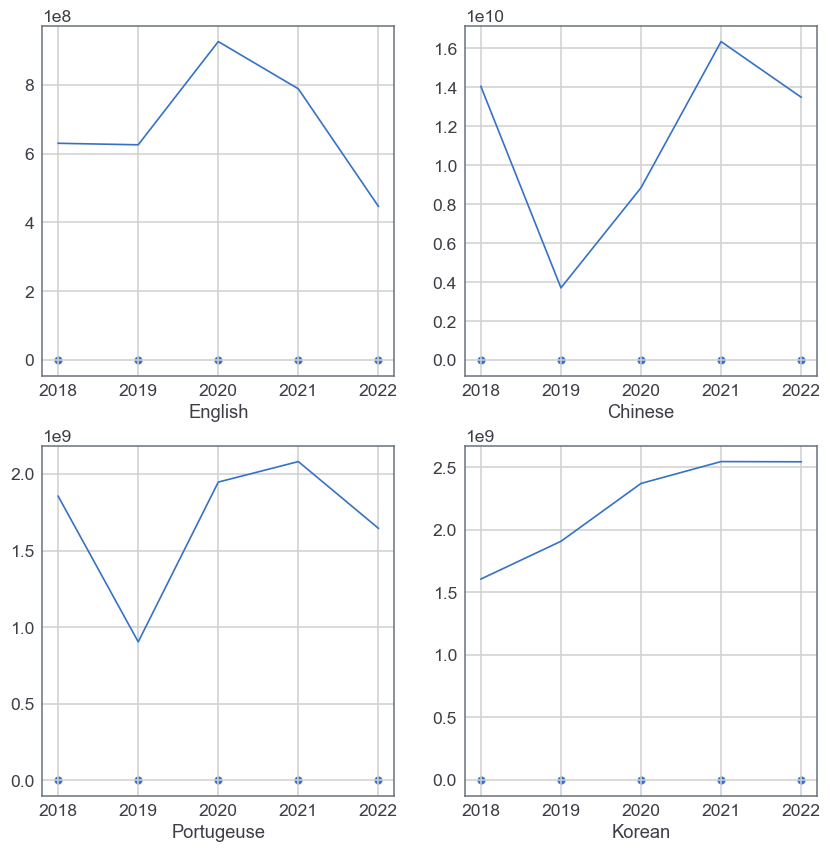

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
axs[0, 0].plot(top_chi["Year"], top_chi["Watch time (mins)"], label = "Watch Time (mins)")
axs[0, 0].scatter(top_chi["Year"], top_chi["Followers"], label = "Total Followers")
axs[0, 1].plot(top_eng["Year"], top_eng["Watch time (mins)"], label = "Watch Time (mins)")
axs[0, 1].scatter(top_eng["Year"], top_eng["Followers"], label = "Total Followers")
axs[1, 0].plot(top_por["Year"], top_por["Watch time (mins)"], label = "Watch Time (mins)")
axs[1, 0].scatter(top_por["Year"], top_por["Followers"], label = "Total Followers")
axs[1, 1].plot(top_kor["Year"], top_kor["Watch time (mins)"], label = "Watch Time (mins)")
axs[1, 1].scatter(top_kor["Year"], top_kor["Followers"], label = "Total Followers")
axs[0, 0].set_xlabel("English")
axs[0, 1].set_xlabel("Chinese")
axs[1, 0].set_xlabel("Portugeuse")
axs[1, 1].set_xlabel("Korean")
# axs[0, 0].set_yscale('log')
# axs[1, 0].set_yscale('log')
# axs[0, 1].set_yscale('log')
# axs[1, 1].set_yscale('log')
# axs[0, 0].legend(loc='upper right')
# axs[0, 1].legend(bbox_to_anchor=(1.1, 1.05))
# axs[1, 0].legend(loc='upper right')
# axs[1, 1].legend(bbox_to_anchor=(1.1, 1.05))

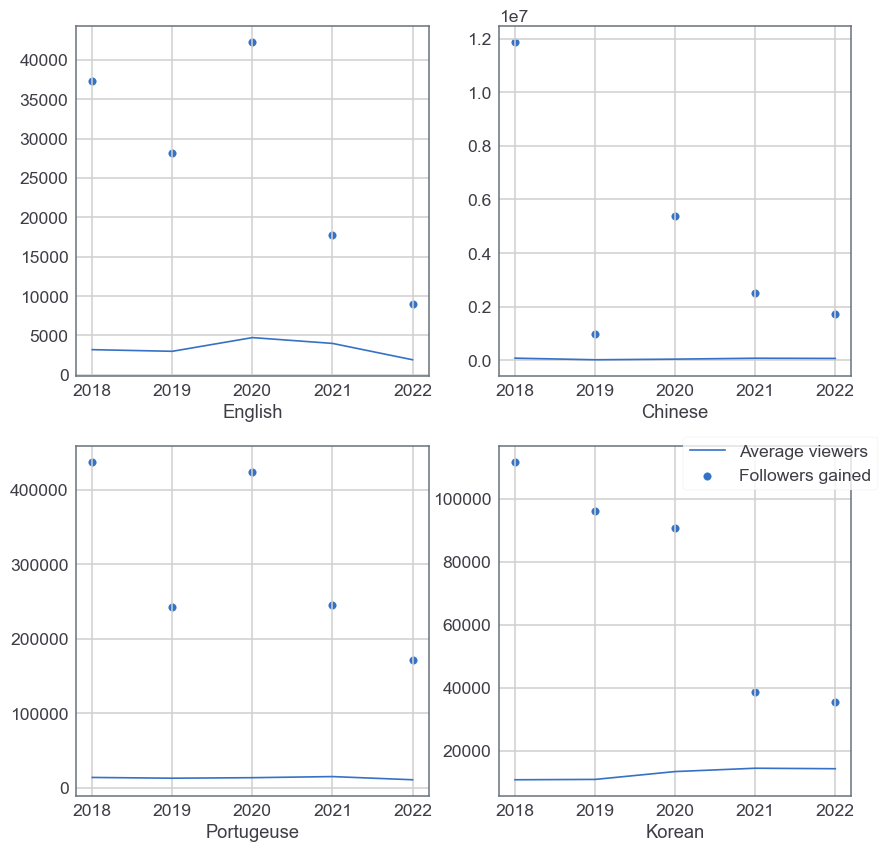

In [9]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
axs[0, 0].plot(top_chi["Year"], top_chi["Average viewers"], label = "Average viewers")
axs[0, 0].scatter(top_chi["Year"], top_chi["Followers gained"], label = "Followers gained")
axs[0, 1].plot(top_eng["Year"], top_eng["Average viewers"], label = "Average viewers")
axs[0, 1].scatter(top_eng["Year"], top_eng["Followers gained"], label = "Followers gained")
axs[1, 0].plot(top_por["Year"], top_por["Average viewers"], label = "Average viewers")
axs[1, 0].scatter(top_por["Year"], top_por["Followers gained"], label = "Followers gained")
axs[1, 1].plot(top_kor["Year"], top_kor["Average viewers"], label = "Average viewers")
axs[1, 1].scatter(top_kor["Year"], top_kor["Followers gained"], label = "Followers gained")
axs[0, 0].set_xlabel("English")
axs[0, 1].set_xlabel("Chinese")
axs[1, 0].set_xlabel("Portugeuse")
axs[1, 1].set_xlabel("Korean")
# axs.legend()
# axs[0, 0].legend(loc='upper left')
# axs[0, 1].legend(loc='upper left')
# axs[1, 0].legend(loc='upper left')
axs[1, 1].legend(bbox_to_anchor=(1.1, 1.05))


# axs[1, 0].legend()
# axs[1, 1].legend()
# axs[0, 0].set_yscale('log')

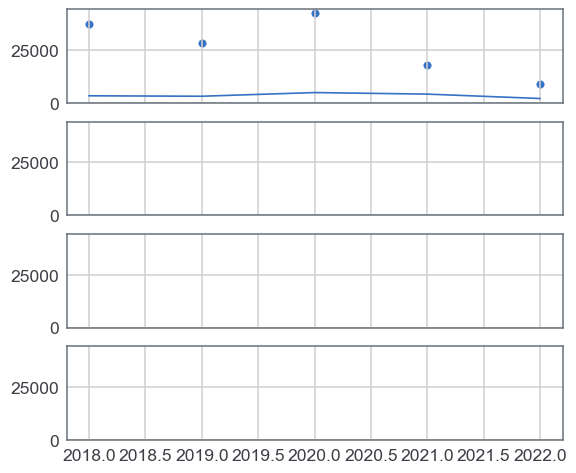

In [10]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.plot(top_chi["Year"], top_chi["Average viewers"])
ax1.scatter(top_chi["Year"], top_chi["Followers gained"])
# ax2[0, 1].plot(top_eng["Year"], top_chi["Average viewers"])
# ax2[0, 1].scatter(top_eng["Year"], top_chi["Followers gained"])
# ax3[1, 0].plot(top_por["Year"], top_por["Average viewers"])
# ax3[1, 0].scatter(top_por["Year"], top_por["Followers gained"])
# ax4[1, 1].plot(top_kor["Year"], top_kor["Average viewers"])
# ax4[1, 1].scatter(top_kor["Year"], top_kor["Followers gained"])


In [11]:
channel_data["watch_time"] = channel_data["Watch time (mins)"]
channel_data["stream_time"] = channel_data["Stream time (mins)"]
# 2-way ANOVA --PR(>f) column is p-value
model1 = ols(
    'Followers ~ watch_time + Language +\
    watch_time:Language', data=channel_data).fit()

sm.stats.anova_lm(model, typ=2)

NameError: name 'model' is not defined

In [ ]:
model2 = ols(
    'Followers ~ stream_time + Language +\
    stream_time:Language', data=channel_data).fit()

sm.stats.anova_lm(model2, typ=2)

In [ ]:
model3 = ols(
    'stream_time ~ Year + Language +\
    Year:Language', data=channel_data).fit()

sm.stats.anova_lm(model3, typ=2)